In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SPY.csv')

### Naive Forecasting

In [8]:
df["Naive"] = df["Close"].shift(1)

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Naive
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


([], [])

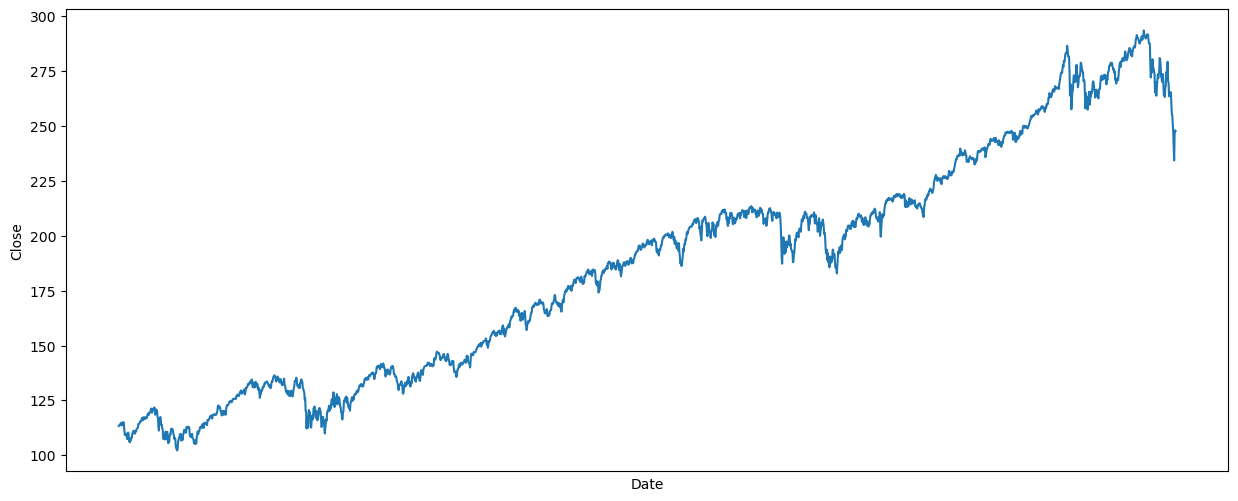

In [26]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Close",data=df)
plt.xticks([]) 

In [28]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['Naive']

In [29]:
y_true

1       113.629997
2       113.709999
3       114.190002
4       114.570000
5       114.730003
           ...    
2258    240.699997
2259    234.339996
2260    246.179993
2261    248.070007
2262    247.750000
Name: Close, Length: 2262, dtype: float64

In [30]:
y_pred

1       113.330002
2       113.629997
3       113.709999
4       114.190002
5       114.570000
           ...    
2258    247.169998
2259    240.699997
2260    234.339996
2261    246.179993
2262    248.070007
Name: Naive, Length: 2262, dtype: float64

### Metrics 

In [45]:
#SSE 
sse = (y_true-y_pred).dot(y_true-y_pred)

In [33]:
from sklearn.metrics import mean_squared_error

In [48]:
#MSE 
mse = mean_squared_error(y_true,y_pred)
mse

2.7985739564511976

In [41]:
mean_squared_error(y_true,y_pred) == ((y_true-y_pred).dot(y_true-y_pred))/len(y_true)

True

In [51]:
#RMSE
rmse = np.sqrt(sse/len(y_true))
rmse

1.6728938867875625

In [52]:
rmse == mean_squared_error(y_true,y_pred,squared = False)

True

In [53]:
#MAE
from sklearn.metrics import mean_absolute_error

In [55]:
mae = mean_absolute_error(y_true,y_pred)
mae

1.1457559803120336

In [56]:
#R2
from sklearn.metrics import r2_score

In [58]:
r2 = r2_score(y_true,y_pred)
r2

0.9989603259063914

In [59]:
#MAPE
from sklearn.metrics import mean_absolute_percentage_error

In [61]:
mape = mean_absolute_percentage_error(y_true,y_pred)
mape

0.006494073151422375

In [64]:
#SMAPE
def smape(y_true,y_pred):
    n = np.abs(y_true - y_pred)
    d = (np.abs(y_true) + np.abs(y_pred))/2
    r = n/d
    return r.mean()

In [65]:
smape(y_true,y_pred)

0.0064913658140684175